In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/1mayo - agosto 2021.csv', nrows=300000)

In [3]:
df.head()

,MAC,weekday,fecha_servidor,fecha_esp32,voltaje,corriente,potencia,frecuencia,energia,fp,ESP32_temp,WORKSTATION_CPU,WORKSTATION_CPU_POWER,WORKSTATION_CPU_TEMP,WORKSTATION_GPU,WORKSTATION_GPU_POWER,WORKSTATION_GPU_TEMP,WORKSTATION_RAM,WORKSTATION_RAM_POWER
0,3C:61:05:12:96:30,4,2021-05-06 10:00:00,2021-05-06 10:00:00,120.1,0.93,96.3,60.0,1.16,0.86,0,0,0,0,0,0,0,0,0
1,3C:61:05:12:96:30,4,2021-05-06 10:00:01,2021-05-06 10:00:01,120.1,0.93,96.3,59.9,1.16,0.86,0,0,0,0,0,0,0,0,0
2,3C:61:05:12:96:30,4,2021-05-06 10:00:01,2021-05-06 10:00:01,120.0,0.94,96.6,59.9,1.16,0.86,0,0,0,0,0,0,0,0,0
3,3C:61:05:12:96:30,4,2021-05-06 10:00:02,2021-05-06 10:00:02,120.0,0.94,96.6,59.9,1.16,0.86,0,0,0,0,0,0,0,0,0
4,3C:61:05:12:96:30,4,2021-05-06 10:00:03,2021-05-06 10:00:03,120.0,0.94,96.6,59.9,1.16,0.86,0,0,0,0,0,0,0,0,0


In [2]:
input_file = '../datasets/initial_may_august.csv'
output_file = '../datasets/cleaned.csv'

chunk_size = 100000
processed_rows = 0

with pd.read_csv(input_file, chunksize=chunk_size) as reader:
    for i, chunk in enumerate(reader):
        chunk = chunk[chunk['WORKSTATION_CPU_TEMP'] != 0]

        if i == 0:
            chunk.to_csv(output_file, index=False, mode='w')
        else:
            chunk.to_csv(output_file, index=False, mode='a', header=False)

In [3]:
df = pd.read_csv(output_file)
df.head()

,MAC,weekday,fecha_servidor,fecha_esp32,voltaje,corriente,potencia,frecuencia,energia,fp,ESP32_temp,WORKSTATION_CPU,WORKSTATION_CPU_POWER,WORKSTATION_CPU_TEMP,WORKSTATION_GPU,WORKSTATION_GPU_POWER,WORKSTATION_GPU_TEMP,WORKSTATION_RAM,WORKSTATION_RAM_POWER
0,3C:61:05:12:96:30,4,2021-06-10 02:13:04,2021-06-10 02:13:04,119.9,1.14,125.1,59.9,81.89,0.92,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97
1,3C:61:05:12:96:30,4,2021-06-10 02:13:05,2021-06-10 02:13:05,120.0,1.04,113.3,59.9,81.89,0.91,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97
2,3C:61:05:12:96:30,4,2021-06-10 02:13:06,2021-06-10 02:13:06,119.9,1.17,128.4,60.0,81.89,0.92,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97
3,3C:61:05:12:96:30,4,2021-06-10 02:13:07,2021-06-10 02:13:07,119.9,1.17,128.4,60.0,81.89,0.92,33.89,13.67,36.36,36,2.0,35,14.51,32.45,10.16
4,3C:61:05:12:96:30,4,2021-06-10 02:13:08,2021-06-10 02:13:08,120.0,1.08,117.9,60.0,81.89,0.91,33.89,13.67,36.36,36,2.0,35,14.51,32.45,10.16


In [4]:
df.shape

(560909, 19)

In [5]:
df['Date'] = pd.to_datetime(df['fecha_servidor']) 
df.head()

,MAC,weekday,fecha_servidor,fecha_esp32,voltaje,corriente,potencia,frecuencia,energia,fp,ESP32_temp,WORKSTATION_CPU,WORKSTATION_CPU_POWER,WORKSTATION_CPU_TEMP,WORKSTATION_GPU,WORKSTATION_GPU_POWER,WORKSTATION_GPU_TEMP,WORKSTATION_RAM,WORKSTATION_RAM_POWER,Date
0,3C:61:05:12:96:30,4,2021-06-10 02:13:04,2021-06-10 02:13:04,119.9,1.14,125.1,59.9,81.89,0.92,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97,2021-06-10 02:13:04
1,3C:61:05:12:96:30,4,2021-06-10 02:13:05,2021-06-10 02:13:05,120.0,1.04,113.3,59.9,81.89,0.91,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97,2021-06-10 02:13:05
2,3C:61:05:12:96:30,4,2021-06-10 02:13:06,2021-06-10 02:13:06,119.9,1.17,128.4,60.0,81.89,0.92,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97,2021-06-10 02:13:06
3,3C:61:05:12:96:30,4,2021-06-10 02:13:07,2021-06-10 02:13:07,119.9,1.17,128.4,60.0,81.89,0.92,33.89,13.67,36.36,36,2.0,35,14.51,32.45,10.16,2021-06-10 02:13:07
4,3C:61:05:12:96:30,4,2021-06-10 02:13:08,2021-06-10 02:13:08,120.0,1.08,117.9,60.0,81.89,0.91,33.89,13.67,36.36,36,2.0,35,14.51,32.45,10.16,2021-06-10 02:13:08


In [6]:
df.drop(columns=['fecha_servidor', 'fecha_esp32', 'MAC'], inplace=True)

In [7]:
df.head()

,weekday,voltaje,corriente,potencia,frecuencia,energia,fp,ESP32_temp,WORKSTATION_CPU,WORKSTATION_CPU_POWER,WORKSTATION_CPU_TEMP,WORKSTATION_GPU,WORKSTATION_GPU_POWER,WORKSTATION_GPU_TEMP,WORKSTATION_RAM,WORKSTATION_RAM_POWER,Date
0,4,119.9,1.14,125.1,59.9,81.89,0.92,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97,2021-06-10 02:13:04
1,4,120.0,1.04,113.3,59.9,81.89,0.91,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97,2021-06-10 02:13:05
2,4,119.9,1.17,128.4,60.0,81.89,0.92,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97,2021-06-10 02:13:06
3,4,119.9,1.17,128.4,60.0,81.89,0.92,33.89,13.67,36.36,36,2.0,35,14.51,32.45,10.16,2021-06-10 02:13:07
4,4,120.0,1.08,117.9,60.0,81.89,0.91,33.89,13.67,36.36,36,2.0,35,14.51,32.45,10.16,2021-06-10 02:13:08


In [8]:
df = df.rename(columns={
    'Date': 'timestamp',
    'voltaje': 'Voltage (V)',
    'corriente': 'Current (A)',
    'potencia': 'Power (PA) - Watts (W)',
    'frecuencia': 'Frequency - Hertz (Hz)',
    'energia': 'Active Energy - kilowatts per hour (KWh)',
    'fp': 'Power factor - Adimentional',
    'ESP32_temp': 'ESP32 temperature - Centigrade Degrees (°C)',
    'WORKSTATION_CPU': 'CPU consumption - Percentage (%)',
    'WORKSTATION_CPU_POWER': 'CPU power consumption - Percentage (%)',
    'WORKSTATION_CPU_TEMP': 'CPU temperature - Centigrade Degrees (°C)',
    'WORKSTATION_GPU': 'GPU consumption - Percentage (%)',
    'WORKSTATION_GPU_POWER': 'GPU power consumption - Percentage (%)',
    'WORKSTATION_GPU_TEMP': 'GPU temperature - Centigrade Degrees (°C)',
    'WORKSTATION_RAM': 'RAM memory consumption - Percentage (%)',
    'WORKSTATION_RAM_POWER': 'RAM memory power consumption - Percentage (%)'
})


In [9]:
df.head()

,weekday,Voltage (V),Current (A),Power (PA) - Watts (W),Frequency - Hertz (Hz),Active Energy - kilowatts per hour (KWh),Power factor - Adimentional,ESP32 temperature - Centigrade Degrees (°C),CPU consumption - Percentage (%),CPU power consumption - Percentage (%),CPU temperature - Centigrade Degrees (°C),GPU consumption - Percentage (%),GPU power consumption - Percentage (%),GPU temperature - Centigrade Degrees (°C),RAM memory consumption - Percentage (%),RAM memory power consumption - Percentage (%),timestamp
0,4,119.9,1.14,125.1,59.9,81.89,0.92,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97,2021-06-10 02:13:04
1,4,120.0,1.04,113.3,59.9,81.89,0.91,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97,2021-06-10 02:13:05
2,4,119.9,1.17,128.4,60.0,81.89,0.92,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97,2021-06-10 02:13:06
3,4,119.9,1.17,128.4,60.0,81.89,0.92,33.89,13.67,36.36,36,2.0,35,14.51,32.45,10.16,2021-06-10 02:13:07
4,4,120.0,1.08,117.9,60.0,81.89,0.91,33.89,13.67,36.36,36,2.0,35,14.51,32.45,10.16,2021-06-10 02:13:08


In [10]:
df.set_index('timestamp', inplace=True)

In [11]:
df_downsampled = df.resample('1T').mean().round(5)
df_downsampled.head()


/tmp/ipykernel_8369/1705422891.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_downsampled = df.resample('1T').mean().round(5)


,weekday,Voltage (V),Current (A),Power (PA) - Watts (W),Frequency - Hertz (Hz),Active Energy - kilowatts per hour (KWh),Power factor - Adimentional,ESP32 temperature - Centigrade Degrees (°C),CPU consumption - Percentage (%),CPU power consumption - Percentage (%),CPU temperature - Centigrade Degrees (°C),GPU consumption - Percentage (%),GPU power consumption - Percentage (%),GPU temperature - Centigrade Degrees (°C),RAM memory consumption - Percentage (%),RAM memory power consumption - Percentage (%)
timestamp,,,,,,,,,,,,,,,,
2021-06-10 02:13:00,4.0,119.90943,1.12075,122.77547,59.97547,81.89000,0.91264,33.86887,11.61642,36.90283,36.22642,2.94340,35.0,14.51226,32.37264,11.52830
2021-06-10 02:14:00,4.0,119.93571,1.10482,120.72500,59.99643,81.89875,0.91107,33.87982,10.72589,37.44643,36.30357,3.41071,35.0,14.53429,32.38661,11.88607
2021-06-10 02:15:00,4.0,119.93333,1.09509,119.63684,59.95965,81.90000,0.91053,33.82105,10.33789,37.83842,35.28070,2.82456,35.0,14.30193,31.81088,11.18930
2021-06-10 02:16:00,4.0,119.91607,1.08018,117.73036,59.97143,81.90000,0.90911,33.83964,8.21179,38.02821,33.85714,0.25000,35.0,13.95964,31.30446,10.77268
2021-06-10 02:17:00,4.0,119.93509,1.07719,117.39825,59.97719,81.90000,0.90982,33.83123,8.35544,38.18632,33.92982,0.33333,35.0,14.00316,31.31772,10.08281


In [12]:
df_downsampled.fillna(method='ffill', inplace=True)  # Forward fill


/tmp/ipykernel_8369/3683715684.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_downsampled.fillna(method='ffill', inplace=True)  # Forward fill


In [13]:
df.columns

Index(['weekday', 'Voltage (V)', 'Current (A)', 'Power (PA) - Watts (W)',
       'Frequency - Hertz (Hz)', 'Active Energy - kilowatts per hour (KWh)',
       'Power factor - Adimentional',
       'ESP32 temperature - Centigrade Degrees (°C)',
       'CPU consumption - Percentage (%)',
       'CPU power consumption - Percentage (%)',
       'CPU temperature - Centigrade Degrees (°C)',
       'GPU consumption - Percentage (%)',
       'GPU power consumption - Percentage (%)',
       'GPU temperature - Centigrade Degrees (°C)',
       'RAM memory consumption - Percentage (%)',
       'RAM memory power consumption - Percentage (%)'],
      dtype='object')

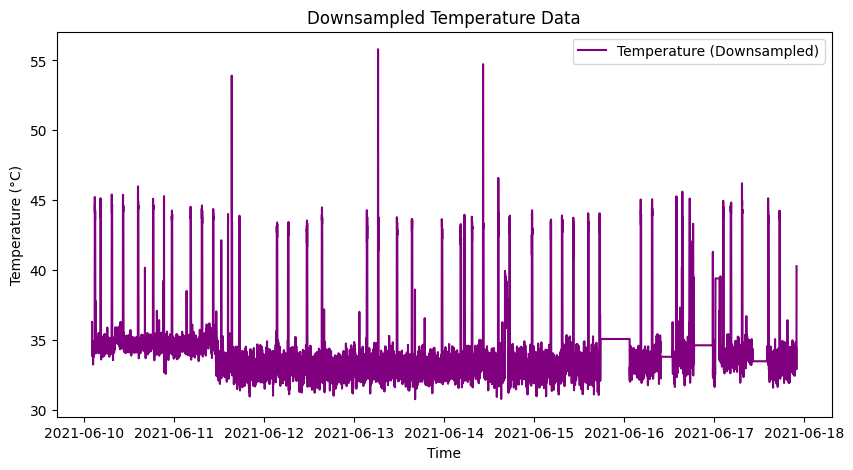

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_downsampled['CPU temperature - Centigrade Degrees (°C)'], label='Temperature (Downsampled)', color='purple')
plt.title('Downsampled Temperature Data')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


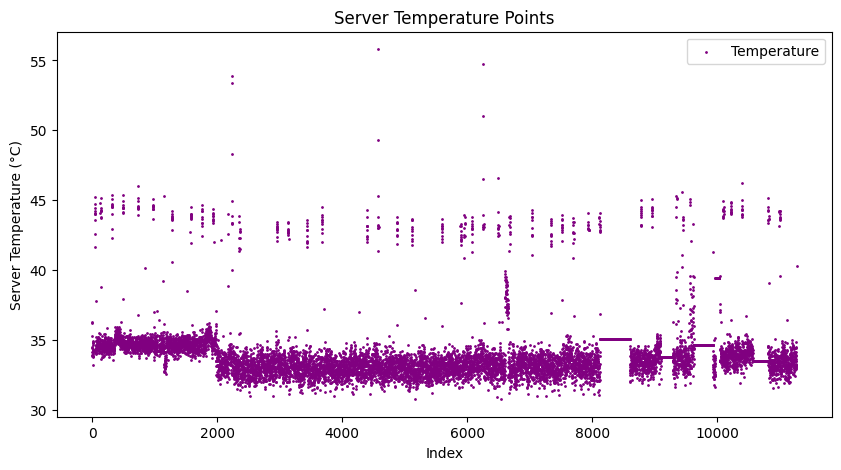

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(df_downsampled)), df_downsampled['CPU temperature - Centigrade Degrees (°C)'].values, color='purple', label='Temperature', s=1)
plt.title('Server Temperature Points')
plt.xlabel('Index')
plt.ylabel('Server Temperature (°C)')
plt.legend()
plt.show()


In [16]:
df_downsampled['CPU temperature - Centigrade Degrees (°C)'].value_counts()

CPU temperature - Centigrade Degrees (°C)
35.07692    470
34.62500    330
33.48387    237
33.80357    219
33.00000     88
           ... 
37.52632      1
38.26786      1
37.17544      1
35.41176      1
35.23810      1
Name: count, Length: 917, dtype: int64

In [17]:
df_downsampled.to_csv('../datasets/final_may_aug.csv', index=True)

In [18]:
df1 = pd.read_csv('../datasets/final_may_aug.csv') 
df1.columns

Index(['timestamp', 'weekday', 'Voltage (V)', 'Current (A)',
       'Power (PA) - Watts (W)', 'Frequency - Hertz (Hz)',
       'Active Energy - kilowatts per hour (KWh)',
       'Power factor - Adimentional',
       'ESP32 temperature - Centigrade Degrees (°C)',
       'CPU consumption - Percentage (%)',
       'CPU power consumption - Percentage (%)',
       'CPU temperature - Centigrade Degrees (°C)',
       'GPU consumption - Percentage (%)',
       'GPU power consumption - Percentage (%)',
       'GPU temperature - Centigrade Degrees (°C)',
       'RAM memory consumption - Percentage (%)',
       'RAM memory power consumption - Percentage (%)'],
      dtype='object')

In [19]:
df2 = pd.read_csv('../datasets/final_aug_dec.csv')
df2.columns

Index(['timestamp', 'weekday', 'Voltage (V)', 'Current (A)',
       'Power (PA) - Watts (W)', 'Frequency - Hertz (Hz)',
       'Active Energy - kilowatts per hour (KWh)',
       'Power factor - Adimentional',
       'ESP32 temperature - Centigrade Degrees (°C)',
       'CPU consumption - Percentage (%)',
       'CPU power consumption - Percentage (%)',
       'CPU temperature - Centigrade Degrees (°C)',
       'GPU consumption - Percentage (%)',
       'GPU power consumption - Percentage (%)',
       'GPU temperature - Centigrade Degrees (°C)',
       'RAM memory consumption - Percentage (%)',
       'RAM memory power consumption - Percentage (%)'],
      dtype='object')

In [20]:
merged_df = pd.concat([df1, df2], ignore_index=True)

In [21]:
merged_df.head()

,timestamp,weekday,Voltage (V),Current (A),Power (PA) - Watts (W),Frequency - Hertz (Hz),Active Energy - kilowatts per hour (KWh),Power factor - Adimentional,ESP32 temperature - Centigrade Degrees (°C),CPU consumption - Percentage (%),CPU power consumption - Percentage (%),CPU temperature - Centigrade Degrees (°C),GPU consumption - Percentage (%),GPU power consumption - Percentage (%),GPU temperature - Centigrade Degrees (°C),RAM memory consumption - Percentage (%),RAM memory power consumption - Percentage (%)
0,2021-06-10 02:13:00,4.0,119.90943,1.12075,122.77547,59.97547,81.89000,0.91264,33.86887,11.61642,36.90283,36.22642,2.94340,35.0,14.51226,32.37264,11.52830
1,2021-06-10 02:14:00,4.0,119.93571,1.10482,120.72500,59.99643,81.89875,0.91107,33.87982,10.72589,37.44643,36.30357,3.41071,35.0,14.53429,32.38661,11.88607
2,2021-06-10 02:15:00,4.0,119.93333,1.09509,119.63684,59.95965,81.90000,0.91053,33.82105,10.33789,37.83842,35.28070,2.82456,35.0,14.30193,31.81088,11.18930
3,2021-06-10 02:16:00,4.0,119.91607,1.08018,117.73036,59.97143,81.90000,0.90911,33.83964,8.21179,38.02821,33.85714,0.25000,35.0,13.95964,31.30446,10.77268
4,2021-06-10 02:17:00,4.0,119.93509,1.07719,117.39825,59.97719,81.90000,0.90982,33.83123,8.35544,38.18632,33.92982,0.33333,35.0,14.00316,31.31772,10.08281


In [23]:
merged_df.shape

(83379, 17)

In [22]:
merged_df.to_csv('../datasets/paper-datasets/merged.csv', index=False)